In [2]:
import numpy as np
import pandas as pd, datetime
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import plotly.graph_objs as go
from plotly.offline import iplot

In [3]:
dataset = pd.read_csv(r"C:\Users\hp\Documents\Downloads\project1_sales_data (1).csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_13648\4099401149.py:1: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,07-31-2015,5263,555,1,1,0,1
1,2,5,07-31-2015,6064,625,1,1,0,1
2,3,5,07-31-2015,8314,821,1,1,0,1
3,4,5,07-31-2015,13995,1498,1,1,0,1
4,5,5,07-31-2015,4822,559,1,1,0,1


In [5]:
dataset.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [6]:
dataset.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
# Extract year, month
dataset['year'] = dataset['Date'].apply(lambda x:x[-4:])
dataset['month'] = dataset['Date'].apply(lambda x:x[1:2])
dataset.drop('Date',axis=1)



,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month
0,1,5,5263,555,1,1,0,1,2015,7
1,2,5,6064,625,1,1,0,1,2015,7
2,3,5,8314,821,1,1,0,1,2015,7
3,4,5,13995,1498,1,1,0,1,2015,7
4,5,5,4822,559,1,1,0,1,2015,7
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,a,1,2013,1
1017205,1112,2,0,0,0,0,a,1,2013,1
1017206,1113,2,0,0,0,0,a,1,2013,1
1017207,1114,2,0,0,0,0,a,1,2013,1


In [8]:
 dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month
0,1,5,07-31-2015,5263,555,1,1,0,1,2015,7
1,2,5,07-31-2015,6064,625,1,1,0,1,2015,7
2,3,5,07-31-2015,8314,821,1,1,0,1,2015,7
3,4,5,07-31-2015,13995,1498,1,1,0,1,2015,7
4,5,5,07-31-2015,4822,559,1,1,0,1,2015,7


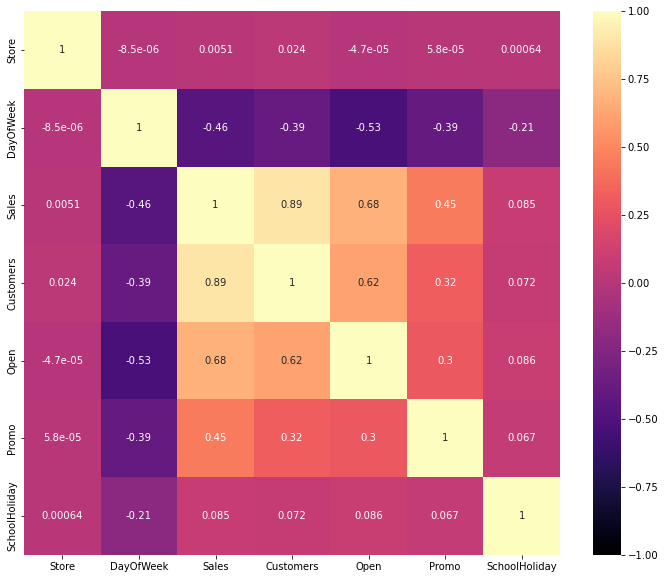

In [9]:
#plot heat map
corr = dataset.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr ,annot=True , vmin=-1.0 ,cmap='magma')
plt.show()

In [10]:
# Sale on open and closed day
dataset.groupby(['Open'])['Sales'].sum()

Open
0             0
1    5873180623
Name: Sales, dtype: int64

In [11]:
#Sale on promo and non promo day
dataset.groupby(['Promo'])['Sales'].sum()




Promo
0    2771974337
1    3101206286
Name: Sales, dtype: int64

In [12]:
# Top 10 sales stores
top_10 = dataset.groupby(['Store'])['Sales'].sum().sort_values(ascending=False)

In [13]:
top_10.head(10)

Store
262     19516842
817     17057867
562     16927322
1114    16202585
251     14896870
513     14252406
788     14082141
733     14067158
383     13489879
756     12911782
Name: Sales, dtype: int64

In [14]:
# Least performance store
Least_10 = dataset.groupby(['Store'])['Sales'].sum().sort_values()


In [15]:
Least_10.head(10)

Store
307    2114322
543    2179287
198    2268273
208    2302052
263    2306075
841    2318635
879    2340576
254    2341661
186    2353548
972    2402627
Name: Sales, dtype: int64

In [16]:
#Average sale on week days
dataset.groupby(['DayOfWeek'])['Sales'].mean()

DayOfWeek
1    7809.044510
2    7005.244467
3    6555.884138
4    6247.575913
5    6723.274305
6    5847.562599
7     204.183189
Name: Sales, dtype: float64

In [17]:
# Per year average sale
dataset.groupby(['year'])['Sales'].mean()

year
2013    5658.533675
2014    5833.290704
2015    5878.245380
Name: Sales, dtype: float64

In [18]:
# Month/year wise sale
dataset.groupby(['month','year'])['Sales'].sum().sort_values(ascending=False)

month  year
2      2013    403244836
       2014    381045269
1      2013    376303131
       2014    361080740
7      2015    212322616
       2013    208843882
6      2015    207363373
3      2015    205631683
       2013    201180369
1      2015    198843730
8      2013    198042727
4      2015    197918886
5      2014    194693257
4      2014    194544977
3      2014    193019854
6      2014    190047051
5      2015    189143897
0      2013    187662330
5      2013    185411063
4      2013    183431432
6      2013    180702351
2      2015    178275458
9      2013    178053963
7      2014    173892707
9      2014    164516168
0      2014    164216398
8      2014    163748475
Name: Sales, dtype: int64

In [19]:
# Store wise sale
dataset.groupby(['Store'])['Sales'].mean()

Store
1        3945.704883
2        4122.991507
3        5741.253715
4        8021.769639
5        3867.110403
            ...     
1111     4342.968153
1112     8465.280255
1113     5516.180467
1114    17200.196391
1115     5225.296178
Name: Sales, Length: 1115, dtype: float64

In [20]:
#Most customer visit month
dataset.groupby(['month'])['Customers'].sum()

month
0     40106150
1    102614191
2    103378104
3     65265836
4     63282009
5     62423484
6     62698087
7     64425231
8     40830683
9     39017980
Name: Customers, dtype: int64

In [21]:
# Observations:
# Most of the cutomers visit in month of  jan and feb
# Max sale was on 2013 and 2014 during jan and feb
# Due to promos 18% sales inc
# Store 262 is best performer



In [22]:
 # Analysis hist and Box plot
def Continous_univariate_Analysis(data,
                                  feature,
                                  figsize=(12, 7),
                                  kde=False,
                                  bins=None):
    f1, (ax_box,
         ax_hist) = plt.subplots(nrows=2,
                                 sharex=True,
                                 gridspec_kw={"height_ratios": (0.25, 0.75)},
                                 figsize=figsize)
    sns.color_palette('crest', as_cmap=True)
    sns.boxplot(data=data,
                x=feature,
                ax=ax_box,
                showmeans=True,
                color='violet')
    sns.histplot(
        data=data, x=feature, ax=ax_hist, kde=kde, bins=bins,
        color='crest') if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist)

    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='red', linestyle='-')

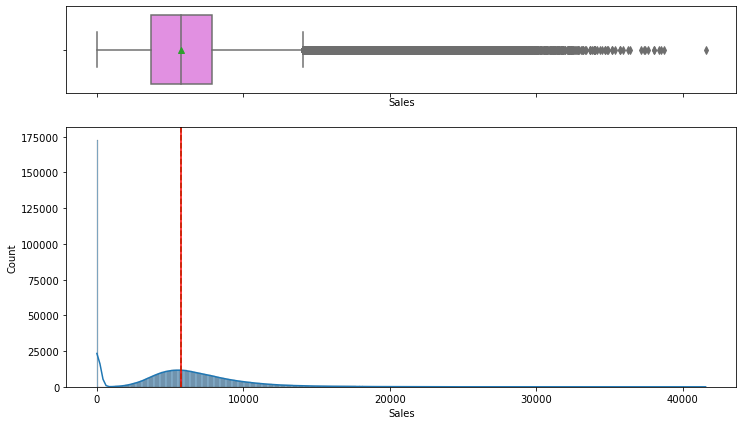

In [23]:
Continous_univariate_Analysis(dataset, 'Sales', kde=True)

In [24]:
# outliers observed when sale > 15000
# Majority of stores sales up to 10000
